In [1]:
%pip install streamlit pandas scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


In [2]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CC/Project - 3/Customer Segmentation Tool.csv")
display(df.head())
display(df.info())

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


None

In [3]:
df.dropna(subset=['CustomerID'], inplace=True)
df['Description'].fillna('Unknown', inplace=True)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
display(df.info())

/tmp/ipython-input-3-1425203719.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Description'].fillna('Unknown', inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   index        397884 non-null  int64         
 1   InvoiceNo    397884 non-null  object        
 2   StockCode    397884 non-null  object        
 3   Description  397884 non-null  object        
 4   Quantity     397884 non-null  int64         
 5   InvoiceDate  397884 non-null  datetime64[ns]
 6   UnitPrice    397884 non-null  float64       
 7   CustomerID   397884 non-null  float64       
 8   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.4+ MB


None

In [4]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Quantity', 'UnitPrice']
categorical_features = ['Country']

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

display(df.head())

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country_Austria,Country_Bahrain,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.038968,2010-12-01 08:26:00,-0.025635,17850.0,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,536365,71053,WHITE METAL LANTERN,-0.038968,2010-12-01 08:26:00,0.012377,17850.0,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,-0.027816,2010-12-01 08:26:00,-0.016585,17850.0,False,False,...,False,False,False,False,False,False,False,False,True,False
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,-0.038968,2010-12-01 08:26:00,0.012377,17850.0,False,False,...,False,False,False,False,False,False,False,False,True,False
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,-0.038968,2010-12-01 08:26:00,0.012377,17850.0,False,False,...,False,False,False,False,False,False,False,False,True,False


Inertia with 4 clusters: 177535.42016796037


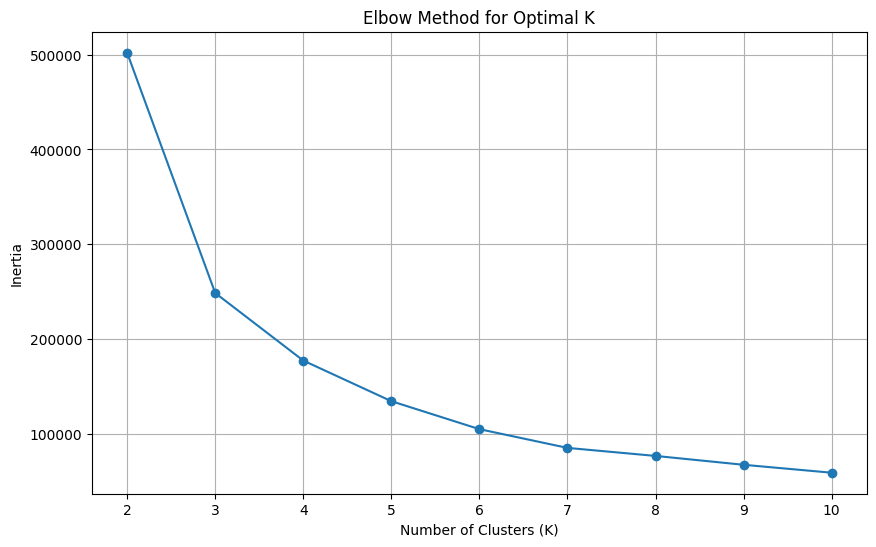

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

features = ['Quantity', 'UnitPrice'] + [col for col in df.columns if col.startswith('Country_')]
X = df[features]

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X)

inertia = kmeans.inertia_
print(f"Inertia with 4 clusters: {inertia}")

inertia_values = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [6]:
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X)

df['Cluster'] = kmeans.labels_

display(df.head())

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country_Austria,Country_Bahrain,...,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,Cluster
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.038968,2010-12-01 08:26:00,-0.025635,17850.0,False,False,...,False,False,False,False,False,False,False,True,False,0
1,1,536365,71053,WHITE METAL LANTERN,-0.038968,2010-12-01 08:26:00,0.012377,17850.0,False,False,...,False,False,False,False,False,False,False,True,False,0
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,-0.027816,2010-12-01 08:26:00,-0.016585,17850.0,False,False,...,False,False,False,False,False,False,False,True,False,0
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,-0.038968,2010-12-01 08:26:00,0.012377,17850.0,False,False,...,False,False,False,False,False,False,False,True,False,0
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,-0.038968,2010-12-01 08:26:00,0.012377,17850.0,False,False,...,False,False,False,False,False,False,False,True,False,0


In [7]:
import streamlit as st

st.title('Customer Segmentation Tool')

uploaded_file = st.file_uploader("Upload your CSV data file", type=["csv"])

if uploaded_file is not None:
    st.success("File uploaded successfully. You can now specify clustering parameters.")
    st.sidebar.header("Clustering Parameters")
    n_clusters = st.sidebar.slider("Number of clusters (K)", min_value=2, max_value=10, value=4, step=1)

    st.subheader("Clustering Results and Visualizations")
    st.write("Results and visualizations will be displayed here after processing.")

2025-06-29 07:32:19.582 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 07:32:19.785 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-29 07:32:19.786 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 07:32:19.789 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 07:32:19.792 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 07:32:19.795 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 07:32:19.798 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 07:32:19.800 Thread 'MainThread': mi

In [8]:
import streamlit as st
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

st.title('Customer Segmentation Tool')

uploaded_file = st.file_uploader("Upload your CSV data file", type=["csv"])

if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)
    st.success("File uploaded successfully. You can now specify clustering parameters.")

    st.sidebar.header("Clustering Parameters")
    n_clusters = st.sidebar.slider("Number of clusters (K)", min_value=2, max_value=10, value=4, step=1)

    st.subheader("Clustering Results and Visualizations")

    if st.button("Run Clustering"):
        df.dropna(subset=['CustomerID'], inplace=True)
        df['Description'].fillna('Unknown', inplace=True)
        df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
        df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

        numerical_features = ['Quantity', 'UnitPrice']
        categorical_features = ['Country']

        scaler = StandardScaler()
        df[numerical_features] = scaler.fit_transform(df[numerical_features])

        df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
        features = ['Quantity', 'UnitPrice'] + [col for col in df.columns if col.startswith('Country_')]
        X = df[features]

        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        kmeans.fit(X)
        df['Cluster'] = kmeans.labels_

        st.write("Clustering complete!")
        st.write("DataFrame with Cluster assignments:")
        st.write(df.head())

2025-06-29 07:32:19.817 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 07:32:19.820 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 07:32:19.823 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 07:32:19.825 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 07:32:19.827 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 07:32:19.828 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 07:32:19.829 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 07:32:19.830 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [9]:
import streamlit as st
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

st.title('Customer Segmentation Tool')

uploaded_file = st.file_uploader("Upload your CSV data file", type=["csv"])

if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)
    st.success("File uploaded successfully. You can now specify clustering parameters.")

    st.sidebar.header("Clustering Parameters")
    n_clusters = st.sidebar.slider("Number of clusters (K)", min_value=2, max_value=10, value=4, step=1)

    st.subheader("Clustering Results and Visualizations")

    if st.button("Run Clustering"):
        df.dropna(subset=['CustomerID'], inplace=True)
        df['Description'].fillna('Unknown', inplace=True)
        df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
        df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

        numerical_features = ['Quantity', 'UnitPrice']
        categorical_features = ['Country']

        scaler = StandardScaler()
        df[numerical_features] = scaler.fit_transform(df[numerical_features])

        df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

        features = ['Quantity', 'UnitPrice'] + [col for col in df.columns if col.startswith('Country_')]
        X = df[features]

        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        kmeans.fit(X)

        df['Cluster'] = kmeans.labels_

        st.write("Clustering complete!")
        st.write("DataFrame with Cluster assignments (first 5 rows):")
        st.write(df.head())

        fig1, ax1 = plt.subplots(figsize=(10, 6))
        sns.scatterplot(data=df, x='Quantity', y='UnitPrice', hue='Cluster', palette='viridis', ax=ax1)
        ax1.set_title('Customer Segments based on Quantity and UnitPrice')
        ax1.set_xlabel('Quantity (Scaled)')
        ax1.set_ylabel('UnitPrice (Scaled)')
        st.pyplot(fig1)

        cluster_counts = df['Cluster'].value_counts().sort_index()
        fig2, ax2 = plt.subplots(figsize=(10, 6))
        sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis', ax=ax2)
        ax2.set_title('Number of Customers per Cluster')
        ax2.set_xlabel('Cluster')
        ax2.set_ylabel('Number of Customers')
        st.pyplot(fig2)

        st.subheader("Cluster Characteristics Summary")
        cluster_summary = df.groupby('Cluster')[numerical_features].mean()
        st.write(cluster_summary)

2025-06-29 07:32:20.362 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 07:32:20.363 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 07:32:20.365 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 07:32:20.367 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 07:32:20.368 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 07:32:20.369 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 07:32:20.370 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 07:32:20.371 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [10]:
import streamlit as st
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

st.title('Customer Segmentation Tool')

uploaded_file = st.file_uploader("Upload your CSV data file", type=["csv"])

if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)
    st.success("File uploaded successfully. You can now specify clustering parameters and predict new customer segments.")

    st.sidebar.header("Clustering Parameters")
    n_clusters = st.sidebar.slider("Number of clusters (K)", min_value=2, max_value=10, value=4, step=1)

    df.dropna(subset=['CustomerID'], inplace=True)
    df['Description'].fillna('Unknown', inplace=True)
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

    numerical_features = ['Quantity', 'UnitPrice']
    categorical_features = ['Country']

    scaler = StandardScaler()
    df[numerical_features] = scaler.fit_transform(df[numerical_features])

    original_countries = df['Country'].unique().tolist()
    df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

    features = ['Quantity', 'UnitPrice'] + [col for col in df.columns if col.startswith('Country_')]
    X = df[features]

    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X)

    df['Cluster'] = kmeans.labels_

    st.subheader("Clustering Results and Visualizations")

    if st.button("Show Clustering Results"):
        st.write("Clustering complete!")
        st.write("DataFrame with Cluster assignments (first 5 rows):")
        st.write(df.head())
        fig1, ax1 = plt.subplots(figsize=(10, 6))
        sns.scatterplot(data=df, x='Quantity', y='UnitPrice', hue='Cluster', palette='viridis', ax=ax1)
        ax1.set_title('Customer Segments based on Quantity and UnitPrice')
        ax1.set_xlabel('Quantity (Scaled)')
        ax1.set_ylabel('UnitPrice (Scaled)')
        st.pyplot(fig1)
        cluster_counts = df['Cluster'].value_counts().sort_index()
        fig2, ax2 = plt.subplots(figsize=(10, 6))
        sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis', ax=ax2)
        ax2.set_title('Number of Customers per Cluster')
        ax2.set_xlabel('Cluster')
        ax2.set_ylabel('Number of Customers')
        st.pyplot(fig2)
        st.subheader("Cluster Characteristics Summary")
        cluster_summary = df.groupby('Cluster')[numerical_features].mean()
        st.write(cluster_summary)

    st.subheader("Predict New Customer Segment")
    with st.form("new_customer_form"):
        new_quantity = st.number_input("Quantity", min_value=0.0, value=1.0)
        new_unitprice = st.number_input("UnitPrice", min_value=0.0, value=1.0)
        new_country = st.selectbox("Country", options=original_countries)

        predict_button = st.form_submit_button("Predict Segment")

        if predict_button:
            new_customer_data = pd.DataFrame({
                'Quantity': [new_quantity],
                'UnitPrice': [new_unitprice],
                'Country': [new_country]
            })

            new_customer_data[numerical_features] = scaler.transform(new_customer_data[numerical_features])

            new_customer_encoded = pd.get_dummies(new_customer_data, columns=categorical_features)

            for feature in features:
                if feature not in new_customer_encoded.columns:
                    new_customer_encoded[feature] = 0

            new_customer_encoded = new_customer_encoded[features]

            predicted_cluster = kmeans.predict(new_customer_encoded)

            st.write(f"The predicted segment for this customer is: Cluster {predicted_cluster[0]}")

2025-06-29 07:32:20.394 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 07:32:20.396 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 07:32:20.398 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 07:32:20.400 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 07:32:20.401 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 07:32:20.402 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 07:32:20.408 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 07:32:20.409 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar